In [1]:

import velocity_metrics.utils.constant as const 
import velocity_metrics.eulerian.eulerian_drifters as eulerian  
import datetime
import sys   
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import cartopy 
import warnings 
warnings.filterwarnings("ignore") 
sys.path.append('/Odyssey/private/t22picar/2024_DC_WOC-ESA/')
from src import utils
import velocity_metrics.utils.constant as const 
import velocity_metrics.eulerian.eulerian_drifters as eulerian  
import datetime
import sys   
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import cartopy 
import warnings 
warnings.filterwarnings("ignore") 
sys.path.append('/Odyssey/private/t22picar/2024_DC_WOC-ESA/')
from src import utils

sys.path.append("../metric/")
from plot_rmse import DictTable_color

dir_eulerian = '/Odyssey/private/t22picar/2024_DC_WOC-ESA/dc_product_evaluation/DC_product_evaluation/eulerian_rms/'
base_outputdir = "../"

def plot_rmse_score_15m(list_xp_name,keys=None):

    print("depth = 15m")

    list_dict = [
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_neurost_15/Eulerian_RMS_neurost.pyo','name':'NeurOST'}]
    list_dict=[]
    for xp_name in list_xp_name:
        outputdir = f'{base_outputdir}/rec/{xp_name}/metric/GulfStream/'
        list_dict = list_dict+[{'type_stat':'Mean','path':outputdir+f'/Eulerian_RMS_{xp_name}.pyo','name':f'{xp_name}'}] 

    print("GulfStream result")
    if keys:
        display(DictTable_color(list_dict,keys=keys))
    else:
        display(DictTable_color(list_dict))

In [2]:
listkey_comp = ('Eastward Correlation', 'Northward Correlation','Norm Correlation', 
           'Eastward Explained Variance (%)', 'Northward Explained Variance (%)','Norm Explained Variance (%)',
           'Number of Points')

In [4]:
xp_name= [#"unet_uv_drifters_aoml_15m_10y_11d_finescale_NA_log",
              "unet_uv_drifters_aoml_15m_10y_11d_4th_NA_log_wind_bathy",
          "unet_uv_drifters_aoml_15m_10y_11d_finescale_NA_log_wind_bathy",
            "unet_uv_drifters_aoml_15m_10y_11d_finescale_NA_log_wind_bathy_res",
          "unet_uv_drifters_aoml_15m_10y_11d_bathy_no_sst_mae",
]
plot_rmse_score_15m(xp_name,keys=listkey_comp)


depth = 15m
GulfStream result


Mean,Eastward Correlation,Northward Correlation,Norm Correlation,Eastward Explained Variance (%),Northward Explained Variance (%),Norm Explained Variance (%),Number of Points
unet_uv_drifters_aoml_15m_10y_11d_4th_NA_log_wind_bathy,0.742,0.693,0.618,59.257,47.904,57.350,51932.000
unet_uv_drifters_aoml_15m_10y_11d_finescale_NA_log_wind_bathy,0.752,0.700,0.626,64.364,53.114,61.232,51925.000
unet_uv_drifters_aoml_15m_10y_11d_finescale_NA_log_wind_bathy_res,0.749,0.695,0.620,59.926,50.886,56.933,51925.000
unet_uv_drifters_aoml_15m_10y_11d_bathy_no_sst_mae,0.762,0.748,0.654,67.201,60.493,62.196,51932.000


In [6]:
listkey_comp = ('Eastward MSD Explained Variance (%)', 'Northward MSD Explained Variance (%)','Norm MSD Explained Variance (%)',
           'Number of Points')

xp_name= ["unet_uv_drifters_aoml_15m_10y_11d_finescale_NA_log_wind_bathy_res"]

plot_rmse_score_15m(xp_name,keys=listkey_comp)


depth = 15m
GulfStream result


Mean,Eastward MSD Explained Variance (%),Northward MSD Explained Variance (%),Norm MSD Explained Variance (%),Number of Points
unet_uv_drifters_aoml_15m_10y_11d_finescale_NA_log_wind_bathy_res,55.527,48.048,12.704,51925.000


In [1]:
WORKDIR = '/Odyssey/private/t22picar/2024_DC_WOC-ESA/dc_product_evaluation/DC_product_evaluation/'
import os
from matplotlib import pyplot
from typing import Tuple, Optional
import velocity_metrics.eulerian.eulerian_drifters as eulerian_drifters
import cartopy

def compare_map(var,ref,to_eval):

        proj = cartopy.crs.PlateCarree()

        dic_p = {'RMSD': {'vmin': 0.1, 'vmax': 0.4, 'cmap': 'YlGnBu_r'},
                'STD': {'vmin': 0.1, 'vmax': 0.4, 'cmap': 'YlGnBu'},
                'Correlation': {'vmin': 0.6, 'vmax':1, 'cmap': 'YlGnBu'},
                'Explained Variance (%)': {'vmin': 50, 'vmax': 85, 'cmap': 'YlGnBu'},
                'Quadratic Error (%)': {'vmin': 30, 'vmax': 65, 'cmap': 'YlGnBu_r'}
                }
        dic_diff = {'RMSD': {'vmin': -0.1, 'vmax': 0.1, 'cmap': 'RdBu_r'},
                'STD': {'vmin': -0.1, 'vmax': -0., 'cmap': 'YlGnBu'},
                'Correlation': {'vmin': -0.15, 'vmax':0.15, 'cmap': 'RdBu'},
                'Explained Variance (%)': {'vmin': -20, 'vmax': 20, 'cmap':'RdBu'},
                'Quadratic Error (%)': {'vmin': -20, 'vmax': 20, 'cmap': 'RdBu_r'}
                }
        ind = 0

        print(f'Diagnostic {var}')
        #print(listdir)
        dic_p = dic_diff
        #ref = listdir[2]
        print(f"ref : {os.path.splitext(os.path.basename(ref))[0]}")
        print(f"to eval : {os.path.splitext(os.path.basename(to_eval))[0]}")
        #print(f'{os.path.splitext(os.path.basename(ref))[0].split('_')[2:]} vs {os.path.splitext(os.path.basename(file))[0].split('_')[2:]}')

        title_ref = os.path.splitext(os.path.basename(ref))[0]
        title_ref = title_ref.split('_')
        title_ref = '_'.join(title_ref[2:])

        title_eval = os.path.splitext(os.path.basename(to_eval))[0]
        title_eval = title_eval.split('_')
        title_eval = '_'.join(title_eval[2:])

        #for file in to_eval:
        bn =  os.path.dirname(to_eval)
        title = os.path.splitext(os.path.basename(to_eval))[0]
        title_list = title.split('_')
        title = '_'.join(title_list[2:])
        fig = eulerian_drifters.plot_bin_diff(to_eval, ref, bn, var,
                                        box=None, #[-5, 11, 35, 43],
                                        vmin=dic_p[var]['vmin'],
                                        vmax=dic_p[var]['vmax'],
                                        cmap=dic_p[var]['cmap'],
                                        proj=proj)
        fig.suptitle(f'{var} {title_ref} (ref) vs {title_eval}') 


Diagnostic Correlation
ref : Eulerian_BINNED_008_047
to eval : Eulerian_BINNED_unet_uv_drifters_aoml_15m_10y_11d_finescale_NA_log


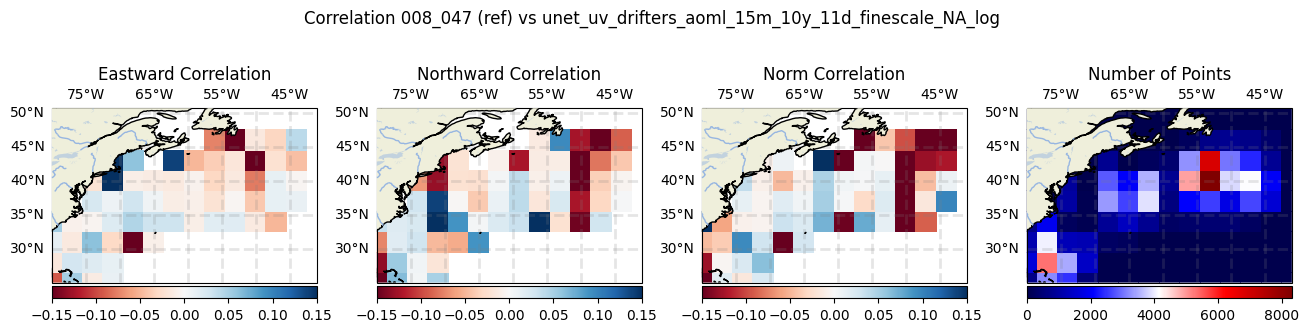

In [5]:
import utils_nb
# Comparer 4-2 ; 0-3
list_region=['GulfStream']

for region in list_region:
     #region = 'Mediterranean'
     depth = '15'
     idir = os.path.join(WORKDIR, 'eulerian_rms')
     listdir = utils_nb.make_list_eulerian(idir, region, depth)
     listvar = ('RMSD',  'Correlation', 'Explained Variance (%)', 'Quadratic Error (%)')
     var = 'Correlation'

     #for listdir_item in listdir:
     #     print(os.path.splitext(os.path.basename(listdir_item))[0])
     ref = listdir[0]

     base_output="../rec"
     xp_name="unet_uv_drifters_aoml_15m_10y_11d_finescale_NA_log"
     if region=='T1':
          region='Agulhas'
          to_eval = f"{base_output}/{xp_name}/metric/{region}/Eulerian_BINNED_{xp_name}.pyo"
     else:
          to_eval = f"{base_output}/{xp_name}/metric/{region}/Eulerian_BINNED_{xp_name}.pyo"

     compare_map(var,ref,to_eval)

In [8]:
import pickle
import glob
import os
import re
import utils_nb
from matplotlib import pyplot
from typing import Tuple, Optional
import velocity_metrics.spectrum.spectrum as spectrum

WORKDIR = '/Odyssey/private/t22picar/2024_DC_WOC-ESA/dc_product_evaluation/DC_product_evaluation/'
# Global Variables
idir = os.path.join(WORKDIR, 'spectrum')
region_list = ["GulfStream"]

base_output="../"

def plot_spectrum_15m(list_xp_name,savefig):

    depth = '1.pyo'
    list_color=['r', 'b', 'c', 'm', 'g', 'y']

    for region in region_list:
        listdir=[]
        print(listdir)
        for xp_name in list_xp_name:
            listdir = listdir + [f"{base_output}rec/{xp_name}/metric/{region}/spectrum_{xp_name}_region_{region}_{depth}"]

        for idir in listdir:
            if '.png' in idir:
                listdir.remove(idir)

        path=f"{base_output}rec/{savefig}/metric/{region}/plot_score/"
        if not os.path.exists(path):
            os.makedirs(path)
        path_save = path+f"spectrum_depth={depth}m.png"

        fig = spectrum.plot(listdir, outfile=path_save, list_color=list_color)
        pyplot.title(f"{region} at 15m")

In [9]:
list_xp_name=["neurost_sst_ssh_15m_4th",
              "globcurrent_15m_4th",
              "unet_uv_drifters_aoml_15m_10y_11d_finescale_NA_log"]
              
xp_name="unet_uv_drifters_cmems_15m_10y_11d_ugos_lat"

plot_spectrum_15m(list_xp_name,savefig=xp_name)

[]


FileNotFoundError: [Errno 2] No such file or directory: '../rec/unet_uv_drifters_aoml_15m_10y_11d_finescale_NA_log/metric/GulfStream/spectrum_unet_uv_drifters_aoml_15m_10y_11d_finescale_NA_log_region_GulfStream_1.pyo'